Dataset Description

```
We collected EEG signal data from 10 college students while they watched MOOC video clips. We extracted online education videos that are assumed not to be confusing for college students, such as videos of the introduction of basic algebra or geometry. We also prepare videos that are expected to confuse a typical college student if a student is not familiar with the video topics like Quantum Mechanics, and Stem Cell Research. We prepared 20 videos, 10 in each category. Each video was about 2 minutes long. We chopped the two-minute clip in the middle of a topic to make the videos more confusing.
The students wore a single-channel wireless MindSet that measured activity over the frontal lobe. The MindSet measures the voltage between an electrode resting on the forehead and two electrodes (one ground and one reference) each in contact with an ear.
After each session, the student rated his/her confusion level on a scale of 1-7, where one corresponded to the least confusing and seven corresponded to the most confusing. These labels if further normalized into labels of whether the students are confused or not. This label is offered as self-labelled confusion in addition to our predefined label of confusion.
```

In [190]:
%cd C:\Users\alif\Reference Project\dataset\EEG Analysis

C:\Users\alif\Reference Project\dataset\EEG Analysis


In [191]:
# load libraries
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

plt.style.use("ggplot")

In [192]:
from warnings import filterwarnings
filterwarnings("ignore")

In [193]:
os.listdir()

['demographic_info.csv', 'EEG_data.csv', 'videos']

In [194]:
# read dataset
info = pd.read_csv('demographic_info.csv')
data = pd.read_csv('EEG_data.csv')

In [195]:
info.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


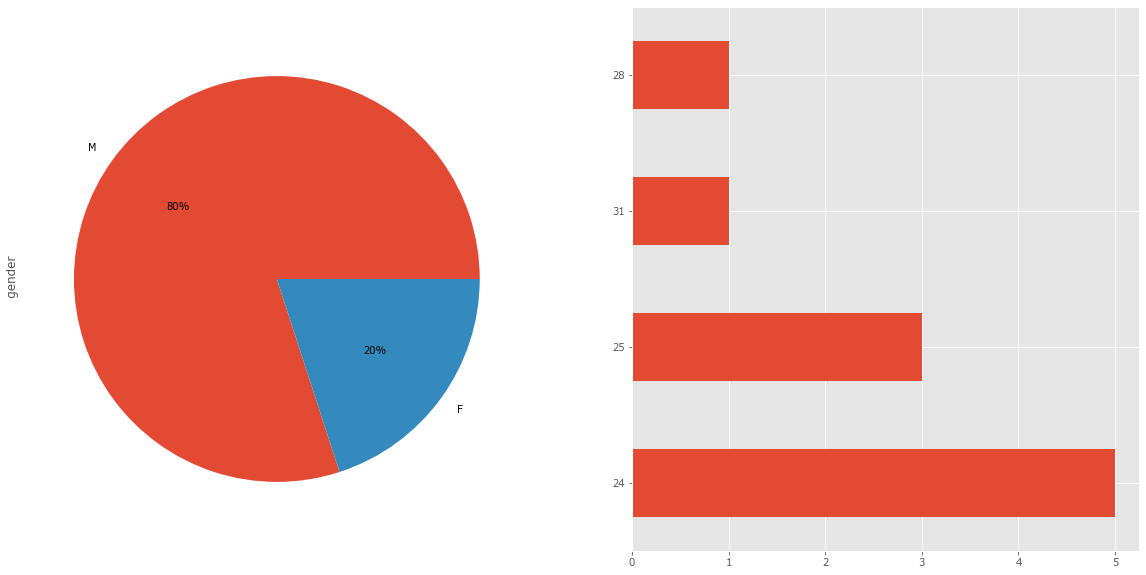

In [196]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
info[' gender'].value_counts().plot(kind = "pie", autopct = "%2.f%%", ax = ax[0])
info[' age'].value_counts().plot(kind = "barh", ax = ax[1]);

In [197]:
data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


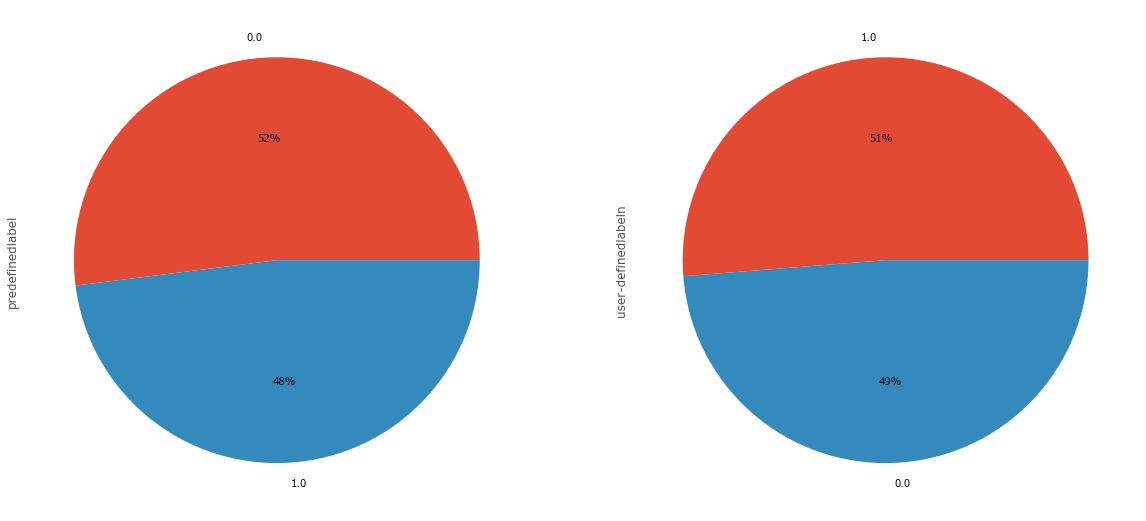

In [198]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
data['predefinedlabel'].value_counts().plot(kind = "pie", autopct = "%2.f%%", ax = ax[0])
data['user-definedlabeln'].value_counts().plot(kind = "pie", autopct = "%2.f%%", ax = ax[1]);

In [199]:
# feature engineering

## convert float to int
data[['SubjectID', 'VideoID', 'predefinedlabel', 'user-definedlabeln']] =  data[['SubjectID', 'VideoID', 'predefinedlabel', 'user-definedlabeln']].astype(int)

In [200]:
data.head(3)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0
1,0,0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0
2,0,0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0


In [201]:
# exploratory data analysis
data['SubjectID']

0        0
1        0
2        0
3        0
4        0
        ..
12806    9
12807    9
12808    9
12809    9
12810    9
Name: SubjectID, Length: 12811, dtype: int32

In [202]:
# overview attention data distribution on each person 
attention_data = data[["SubjectID", "Attention"]]

# information retrieval
## 1261 rows represent as 1 person data

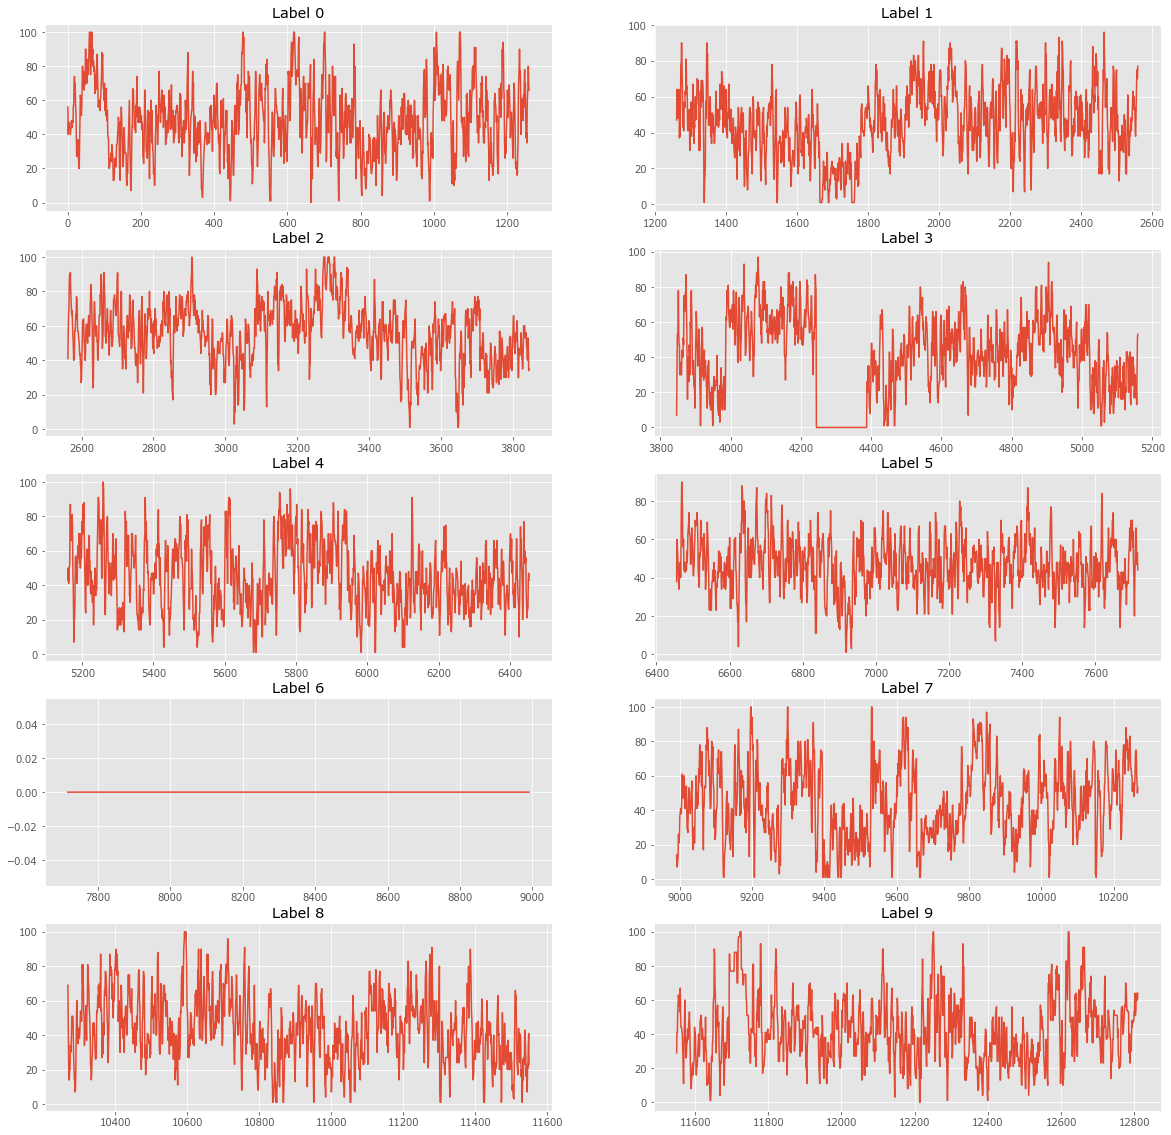

In [203]:
fig, ax = plt.subplots(5, 2, figsize = (20, 20))

label = 0
for row in range(5):
    for col in range(2):
        attention_data[attention_data['SubjectID'] == label]['Attention'].plot(ax = ax[row, col]).set_title(f'Label {label}')
        label += 1
plt.show()    

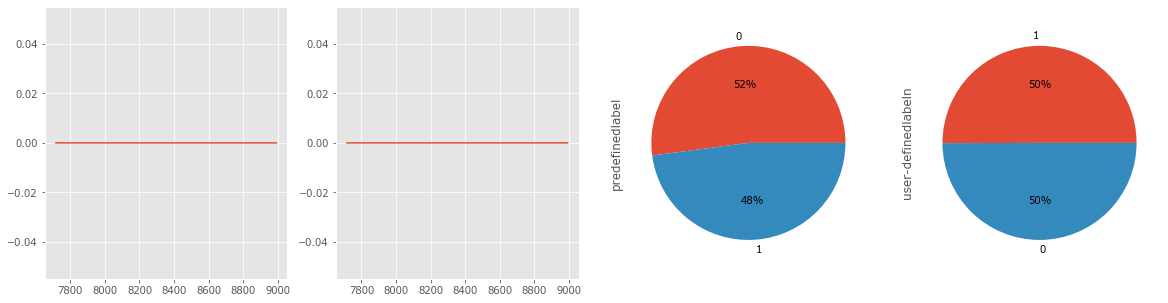

In [204]:
anomalies_subject = data[data['SubjectID'] == 6]

fig, ax = plt.subplots(1, 4, figsize = (20, 5))

anomalies_subject['Attention'].plot(ax = ax[0])
anomalies_subject['Mediation'].plot(ax = ax[1])
anomalies_subject['predefinedlabel'].value_counts().plot(kind = "pie", autopct = "%2.f%%", ax = ax[2])
anomalies_subject['user-definedlabeln'].value_counts().plot(kind = "pie", autopct = "%2.f%%", ax = ax[3])

plt.show()

In [205]:
# remove SubjectID == 6 from original data
data = data.drop(anomalies_subject.index)

In [206]:
data['SubjectID'].value_counts()

3    1314
1    1301
4    1295
2    1284
8    1282
7    1276
5    1262
0    1261
9    1261
Name: SubjectID, dtype: int64

In [207]:
# reset index
data = data.reset_index()
data.head()

,index,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,0,0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0
1,1,0,0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0
2,2,0,0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0
3,3,0,0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0
4,4,0,0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0


In [208]:
# overview miss interpretation between predefined & user labeling
cond = []
sample_label = data[["predefinedlabel", "user-definedlabeln"]]

for i in range(len(sample_label)):
    if sample_label['predefinedlabel'][i] == sample_label['user-definedlabeln'][i]:
        cond.append(True)
    else:
        cond.append(False)

# count freq.
result = {}
for value in cond:
    if value not in result:
        result[value] = 1
    else:
        result[value] += 1

# Feature Engineering

In [209]:
sort_info = info[['subject ID', ' age', ' gender']]

In [210]:
sort_info[sort_info['subject ID'] == 1][' gender'].tolist()

['M']

In [211]:
_id, age, gender = [], [], []

target_row = feature['SubjectID'].value_counts()

for i in sorted(sort_info['subject ID'].value_counts().keys()):
    try:
        _id    += [i] * target_row[i]
        age    += sort_info[sort_info['subject ID'] == i][' age'].tolist() * target_row[i]
        gender += sort_info[sort_info['subject ID'] == i][' gender'].tolist() * target_row[i]
    except Exception as E:
        print(E)

6


In [212]:
# define user-defined label as target
feature = data[['SubjectID', 
                'Raw', 'Delta', 'Theta', 
                'Alpha1', 'Alpha2', 
                'Beta1', 'Beta2', 
                'Gamma1', 'Gamma2']]

# add column from info
feature['age']    = age
feature['gender'] = gender

target  = data['user-definedlabeln']

In [213]:
feature

,SubjectID,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,age,gender
0,0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,25,M
1,0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,25,M
2,0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,25,M
3,0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,25,M
4,0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,25,M
...,...,...,...,...,...,...,...,...,...,...,...,...
11531,9,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,24,F
11532,9,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,24,F
11533,9,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,24,F
11534,9,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,24,F


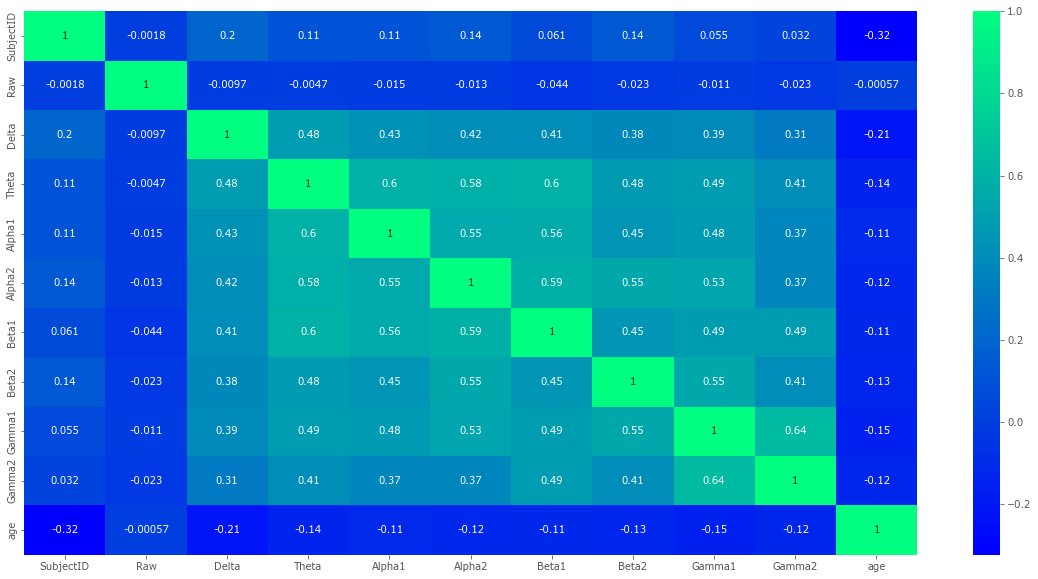

In [214]:
plt.figure(figsize = (20, 10))
sns.heatmap(feature.corr(), annot = True, cmap = "winter");

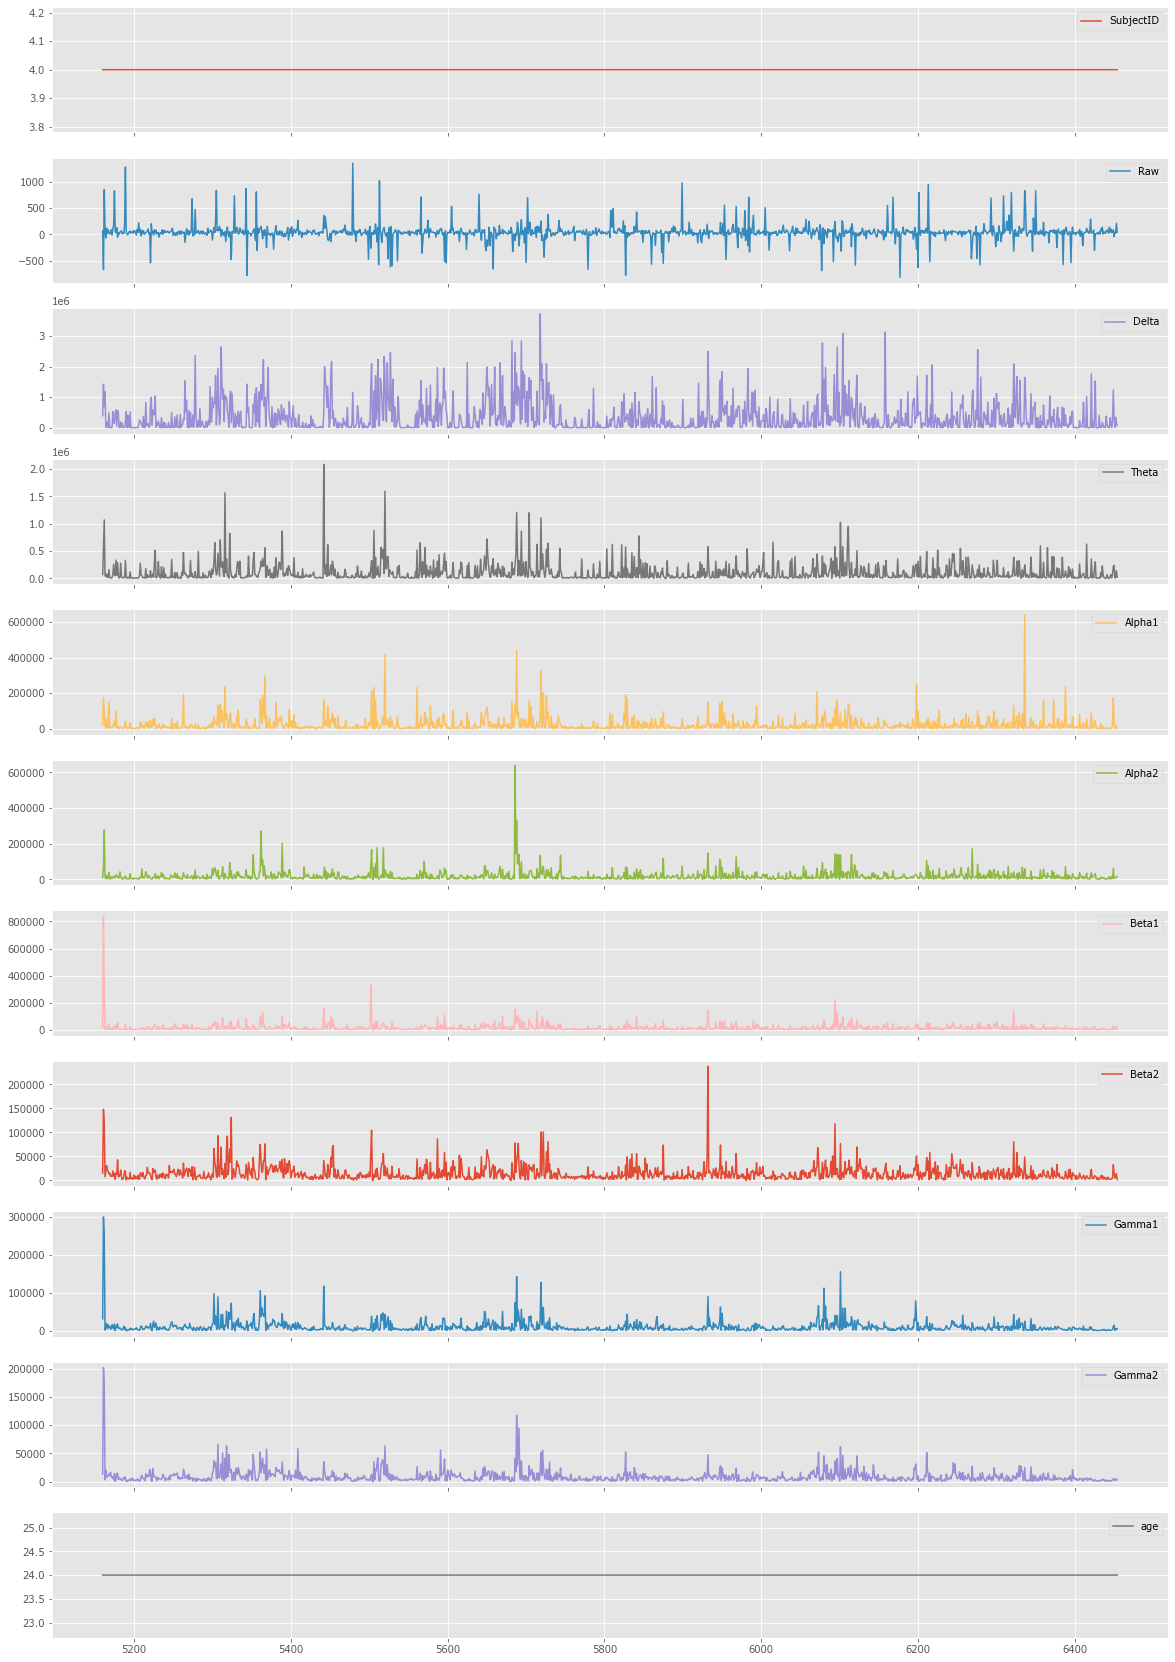

In [215]:
# plot sample 
sample_data = feature[feature['SubjectID'] == 4]

sample_data.plot(subplots = True, figsize = (20, 30));

In [216]:
# data processing


## define feature
X = feature.drop("SubjectID", axis = 1)

## apply label encoder
X['gender'] = X['gender'].replace({'M':1, 'F':2})

## overview
X.head()

,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,age,gender
0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,25,1
1,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,25,1
2,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,25,1
3,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,25,1
4,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,25,1


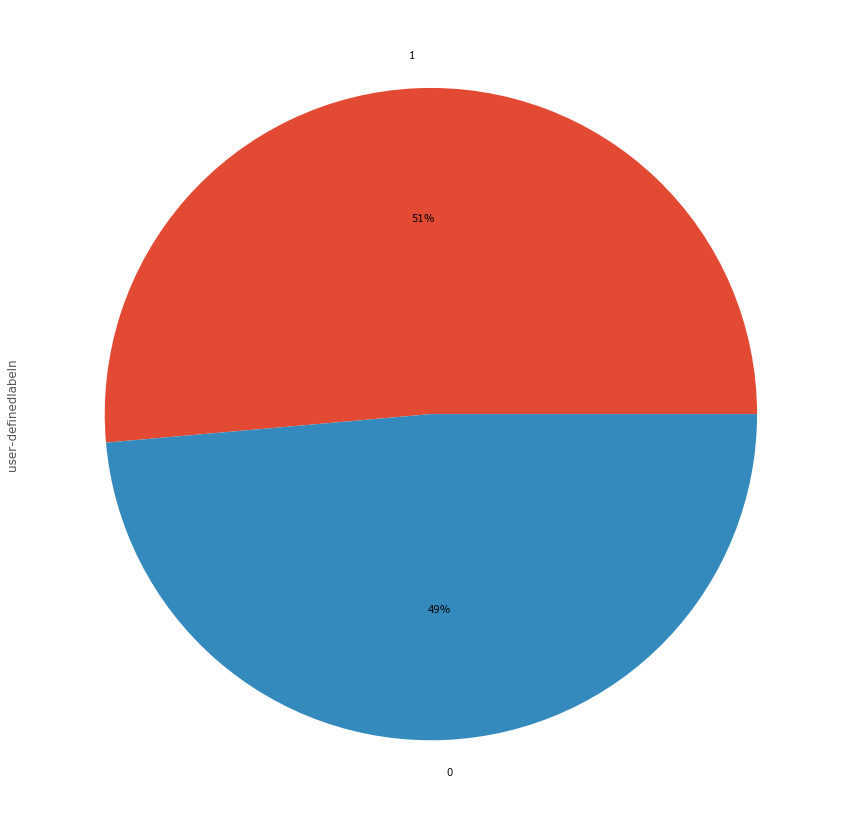

In [217]:
target.value_counts().plot(kind = "pie", autopct = "%2.f%%", figsize = (15, 15));

In [241]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [242]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 123)

In [243]:
# random forest 
model = RandomForestClassifier()

model.fit(X_train, y_train)

# evaluate
prediction = model.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1158
           1       0.66      0.70      0.68      1150

    accuracy                           0.67      2308
   macro avg       0.68      0.67      0.67      2308
weighted avg       0.68      0.67      0.67      2308



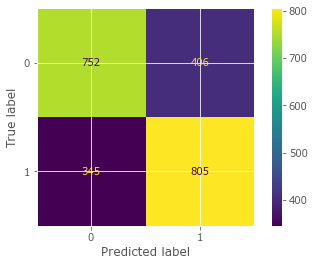

In [244]:
plot_confusion_matrix(model, X_test, y_test);

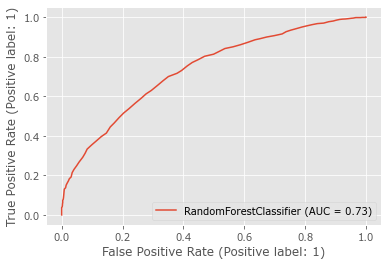

In [245]:
plot_roc_curve(model, X_test, y_test);

In [246]:
# random forest 
model = XGBClassifier()

model.fit(X_train, y_train)

# evaluate
prediction = model.predict(X_test)

print(classification_report(y_test, prediction))

[14:46:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1158
           1       0.63      0.66      0.64      1150

    accuracy                           0.64      2308
   macro avg       0.64      0.64      0.64      2308
weighted avg       0.64      0.64      0.64      2308



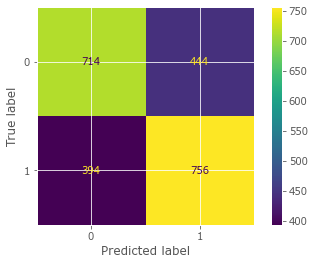

In [247]:
plot_confusion_matrix(model, X_test, y_test);

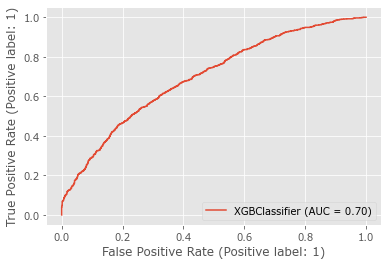

In [248]:
plot_roc_curve(model, X_test, y_test);

### Plan 2

In [266]:
# normalization
norm   = StandardScaler()
X_norm = norm.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 123)

In [267]:
# random forest 
model_choosen = RandomForestClassifier()

model_choosen.fit(X_train, y_train)

# evaluate
prediction = model_choosen.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65      1158
           1       0.65      0.70      0.67      1150

    accuracy                           0.66      2308
   macro avg       0.66      0.66      0.66      2308
weighted avg       0.66      0.66      0.66      2308



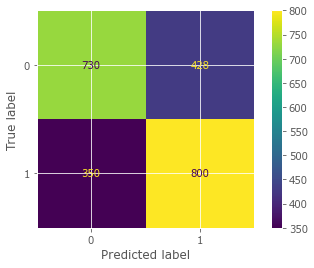

In [268]:
plot_confusion_matrix(model_choosen, X_test, y_test);

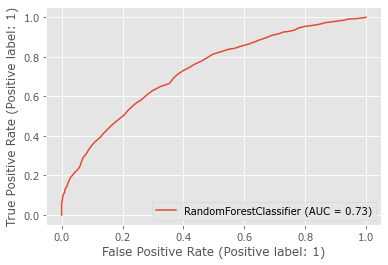

In [269]:
plot_roc_curve(model_choosen, X_test, y_test);

In [270]:
# random forest 
model = XGBClassifier()

model.fit(X_train, y_train)

# evaluate
prediction = model.predict(X_test)

print(classification_report(y_test, prediction))

[14:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1158
           1       0.63      0.66      0.64      1150

    accuracy                           0.64      2308
   macro avg       0.64      0.64      0.64      2308
weighted avg       0.64      0.64      0.64      2308



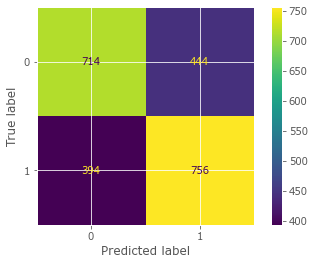

In [271]:
plot_confusion_matrix(model, X_test, y_test);

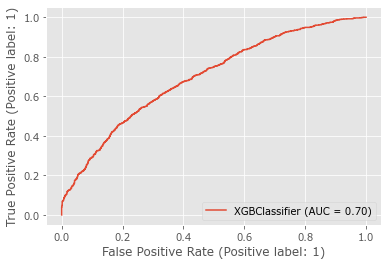

In [262]:
plot_roc_curve(model, X_test, y_test);

In [265]:
metrics = {
    'model': ['Random Forest', 'Xgboost', 'Random Forest Norm', 'Xgboost Norm'],
    'acc'  : [67, 64, 68, 64]
}
final = pd.DataFrame(metrics)
final

,model,acc
0,Random Forest,67
1,Xgboost,64
2,Random Forest Norm,68
3,Xgboost Norm,64


In [278]:
X["Label"] = target
X["Subject"] = data['SubjectID']

In [279]:
X

,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,age,gender,Label,Subject
0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,25,1,0,0
1,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,25,1,0,0
2,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,25,1,0,0
3,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,25,1,0,0
4,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,25,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,24,2,0,9
11532,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,24,2,0,9
11533,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,24,2,0,9
11534,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,24,2,0,9


In [286]:
X.describe()

,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,age,gender,Label,Subject
count,11536.000000,1.153600e+04,1.153600e+04,1.153600e+04,1.153600e+04,11536.000000,1.153600e+04,11536.000000,11536.000000,11536.000000,11536.000000,11536.000000,11536.000000
mean,34.339806,5.900149e+05,1.588479e+05,3.857353e+04,2.816351e+04,20256.508148,2.462005e+04,16925.292042,8214.482490,25.565794,1.223214,0.513956,4.320215
std,131.652667,6.365997e+05,2.365106e+05,6.860648e+04,4.838641e+04,29163.164448,3.711200e+04,25797.069942,11541.638785,2.270713,0.416419,0.499827,2.972714
min,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000,2.000000e+00,1.000000,2.000000,24.000000,1.000000,0.000000,0.000000
25%,-10.000000,9.010200e+04,2.408875e+04,6.628750e+03,6.465750e+03,5678.000000,6.952000e+03,3758.000000,1959.750000,24.000000,1.000000,0.000000,2.000000
50%,34.000000,3.684790e+05,7.338950e+04,1.645600e+04,1.386600e+04,11598.000000,1.417650e+04,8590.000000,4470.000000,25.000000,1.000000,1.000000,4.000000
75%,80.000000,8.913540e+05,1.905018e+05,4.117225e+04,3.042725e+04,24025.750000,2.923800e+04,19290.000000,9829.500000,25.000000,1.000000,1.000000,7.000000
max,1440.000000,3.964663e+06,2.567643e+06,1.369955e+06,1.016913e+06,840994.000000,1.083461e+06,658008.000000,283517.000000,31.000000,2.000000,1.000000,9.000000


In [280]:
X.to_excel("Final Data.xlsx", index = False)

In [283]:
from pickle import dump

dump(model_choosen, open("model.pkl", "wb"))

In [285]:
from pickle import load

test_model = load(open("model.pkl", "rb"))
test_model

RandomForestClassifier()

In [287]:
sample = X[X['Subject'] == 0]

sample

,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,age,gender,Label,Subject
0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,25,1,0,0
1,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,25,1,0,0
2,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,25,1,0,0
3,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,25,1,0,0
4,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,25,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,60.0,143923.0,24122.0,2922.0,5678.0,4067.0,6919.0,5734.0,6978.0,25,1,0,0
1257,-72.0,234752.0,24787.0,975.0,2834.0,3287.0,7684.0,5798.0,7865.0,25,1,0,0
1258,117.0,68376.0,33723.0,19605.0,23755.0,20823.0,29481.0,25891.0,7752.0,25,1,0,0
1259,11.0,143803.0,119188.0,12399.0,11924.0,60105.0,48439.0,36495.0,10540.0,25,1,0,0


In [292]:
sample['Label'].max()

1

In [296]:
np.round((sample[sample['Label'] == 1].shape[0] / len(sample)) * 100, 2)

51.15